# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

# Описание проекта
<br>
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

# Инструкция по выполнению проекта
Откройте файл с данными и изучите его. Путь к файлу: /datasets/users_behavior.csv.

Разделите исходные данные на обучающую, валидационную и тестовую выборки.

Исследуйте качество разных моделей, меняя гиперпараметры. Кратко напишите выводы исследования.

Проверьте качество модели на тестовой выборке.

Дополнительное задание: проверьте модели на вменяемость. Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше. В следующем курсе подробнее об этом расскажем.

# Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.

Известно:

* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
*is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Откройте и изучите файл

In [1]:
import pandas as pd # импорт необходимых библиотек 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyClassifier
import seaborn as sbn
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:  
    data = pd.read_csv('C:/users_behavior.csv')  # открытие файла с данными
except OSError as e:
    data = pd.read_csv('/datasets/users_behavior.csv')
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [3]:
data.info() # получение общей информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


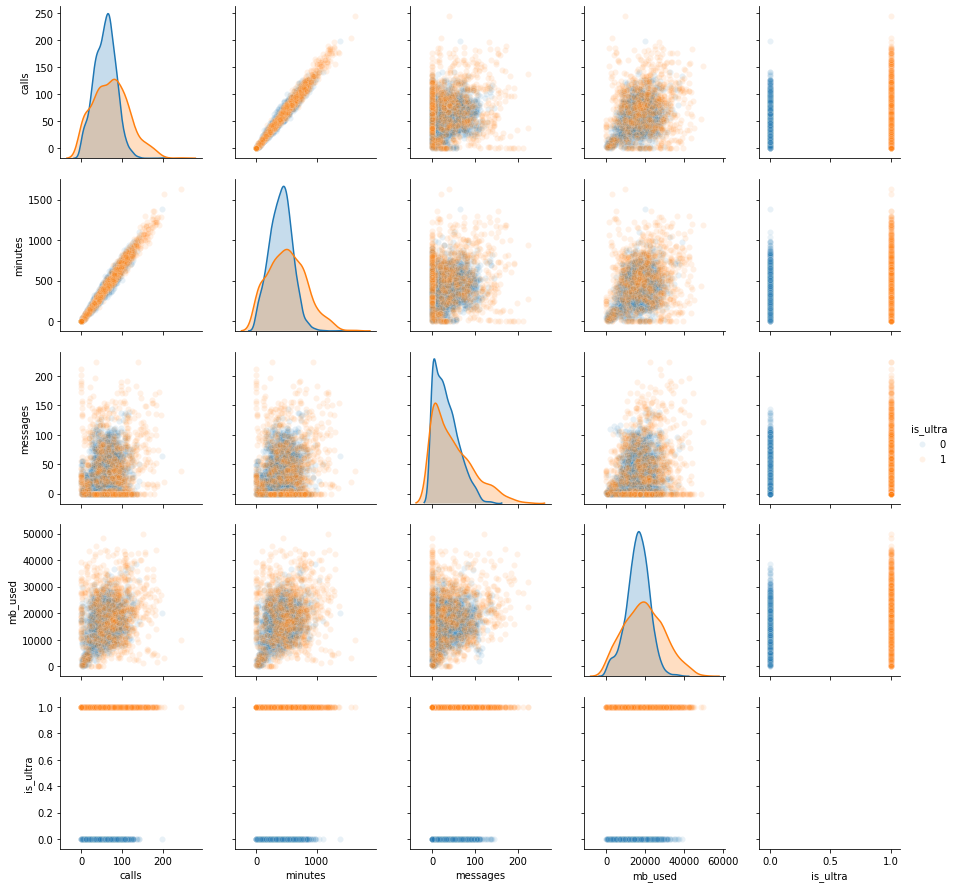

In [4]:
sbn.pairplot(data, hue = 'is_ultra', plot_kws={'alpha':0.1}) # построение корреляций
plt.show()

In [5]:
display(data.corr())

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


# Вывод
<br>
Таблица содержит предобработанные данные, со след. столбцами:


* calls - количество звонков пользователя;
* minutes - количество минут разговоров;
* messages - количество отправленных смс;
* mb_used - количество использованных мегабайт;
* is_ultra - 1 в данной столбце означает, что пользователь пользовался тарифом ultra, 0 - тарифом smart.
<br>

Для данного проекта предобработка данных не требуется.
<br>
Корреляция параметров имеет практически положительный линейный характер. Поэтому считаю, что все параметры важны для составления моделей предсказания. 

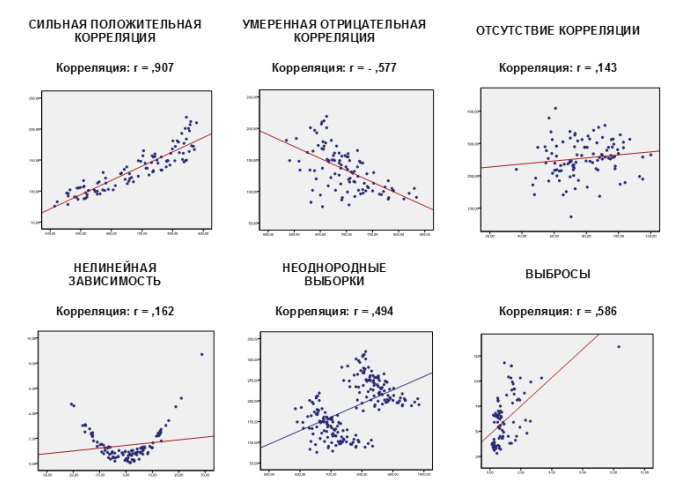

## Разбейте данные на выборки

Разобьем наши данные на три выборки - обучающую, валидационную и тестовую в соотношении 60/20/20.

In [6]:
data = data.drop(['calls'], axis=1)

In [7]:
#отделение обучающей выборки
train_data, other_data = train_test_split(data, test_size=0.40, random_state=12345)
#разделение оставшихся данных на валидационную и тестовую выборки
valid_data, test_data = train_test_split(other_data, test_size=0.50, random_state=12345)

print('Размер обучающей выборки', train_data.shape[0])
print('Размер валидационной выборки', valid_data.shape[0])
print('Размер тестовой выборки', test_data.shape[0])

Размер обучающей выборки 1928
Размер валидационной выборки 643
Размер тестовой выборки 643


Отделим значимый столбец (is_ultra) от каждой выборки в отдельную переменную.

In [8]:
train_data_features = train_data.drop(['is_ultra'], axis=1)
train_data_target = train_data['is_ultra']
valid_data_features = valid_data.drop(['is_ultra'], axis=1)
valid_data_target = valid_data['is_ultra']
test_data_features = test_data.drop(['is_ultra'], axis=1)
test_data_target = test_data['is_ultra']

# Вывод
<br>
Таким образом, разбили генеральную совокупность на три выборки в соотношении 60/20/20. Отдельно выделим целевой признак в  переменную "is_ultra".

## Исследуйте модели

Столбец "is_ultra" иммет тип классификации, поэтому проверим три модели - решающее дерево, случайный лес, логистическую регрессию.

### Решающее дерево
<br>
Поиск лучшей модели решающего дерева.

In [9]:
depth_graph = [] # создание списков для построения графика
accuracy_draph = [] # поиск лучшего результата меняя глубину дерева
top_depth = 0
top_result = 0
for depth in range(1, 40):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # для фиксации псевдослучайности алгоритма обучения
    model.fit(train_data_features, train_data_target)           # укажем параметр random_state = 12345
    predictions_valid = model.predict(valid_data_features)
    accuracy = accuracy_score(valid_data_target,  predictions_valid)
    depth_graph.append(depth)
    accuracy_draph.append(accuracy)
    if accuracy > top_result:
        top_result, top_depth = accuracy, depth
    print("max_depth =", depth, ": ", end='')
    print(accuracy)    # посмотрим точность модели
    
print(top_depth, top_result)

max_depth = 1 : 0.7542768273716952
max_depth = 2 : 0.7822706065318819
max_depth = 3 : 0.7853810264385692
max_depth = 4 : 0.7884914463452566
max_depth = 5 : 0.7884914463452566
max_depth = 6 : 0.7744945567651633
max_depth = 7 : 0.7713841368584758
max_depth = 8 : 0.7744945567651633
max_depth = 9 : 0.7791601866251944
max_depth = 10 : 0.7698289269051322
max_depth = 11 : 0.7667185069984448
max_depth = 12 : 0.7698289269051322
max_depth = 13 : 0.7573872472783826
max_depth = 14 : 0.7387247278382582
max_depth = 15 : 0.744945567651633
max_depth = 16 : 0.7387247278382582
max_depth = 17 : 0.7309486780715396
max_depth = 18 : 0.7216174183514774
max_depth = 19 : 0.7216174183514774
max_depth = 20 : 0.7216174183514774
max_depth = 21 : 0.7153965785381027
max_depth = 22 : 0.7169517884914464
max_depth = 23 : 0.7122861586314152
max_depth = 24 : 0.7122861586314152
max_depth = 25 : 0.7122861586314152
max_depth = 26 : 0.7122861586314152
max_depth = 27 : 0.7122861586314152
max_depth = 28 : 0.7122861586314152
ma

Построение графика для наглядности

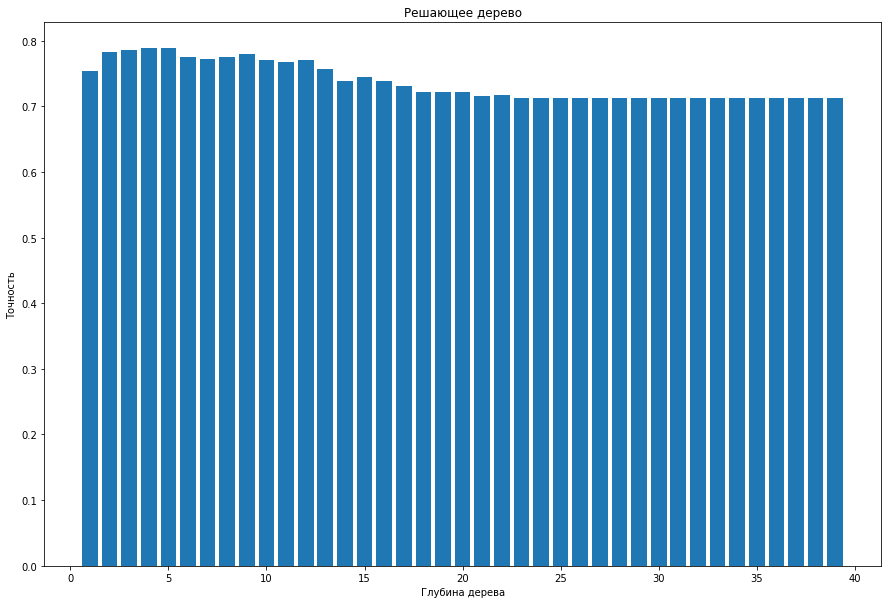

In [10]:
plt.figure(figsize=(15,10))
plt.bar(depth_graph, accuracy_draph)
plt.title('Решающее дерево')
plt.xlabel("Глубина дерева");
plt.ylabel("Точность");

Наилучший результат показала глубина дерева равная 3.
Проверим поменяется ли точность при изменении гиперпараметров.

<div class="alert alert-info"> <b> Наилучший результат показала глубина дерева равная 4. </div>

In [22]:
model = DecisionTreeClassifier(random_state=12345, max_depth=4) #модель без изменения гиперпараметров
model.fit(train_data_features, train_data_target)
predictions_valid = model.predict(valid_data_features)
print('Без изменения : ', end='')
print(accuracy_score(valid_data_target,  predictions_valid))

model = DecisionTreeClassifier(random_state=12345, max_depth=4, criterion="entropy") #изменение значения criterion на entropy
model.fit(train_data_features, train_data_target)
predictions_valid = model.predict(valid_data_features)
print('entropy : ', end='')
print(accuracy_score(valid_data_target,  predictions_valid))

model = DecisionTreeClassifier(random_state=12345, max_depth=4, splitter='random') #изменение значения splitter на random
model.fit(train_data_features, train_data_target)
predictions_valid = model.predict(valid_data_features)
print('random : ', end='')
print(accuracy_score(valid_data_target,  predictions_valid))

model = DecisionTreeClassifier(random_state=12345, max_depth=4, criterion="entropy", splitter='random') #применение двух изменений
model.fit(train_data_features, train_data_target)
predictions_valid = model.predict(valid_data_features)
print('entropy и random : ', end='')
print(accuracy_score(valid_data_target,  predictions_valid))

Без изменения : 0.7884914463452566
entropy : 0.7853810264385692
random : 0.7480559875583204
entropy и random : 0.7480559875583204


Изменение гиперпараметров не показало лучших результатов.

### Случайный лес
Поиск лучшей модели случайного леса.

In [12]:
n_estimators_graph = [] #создание списков для построения графика
result_draph = []
top_est = 0
top_result = 0
for est in range(1, 30):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # меняя параметр n_estimators найдем лучший результат
    model.fit(train_data_features, train_data_target)
    valid_predictions = model.predict(valid_data_features)
    result = accuracy_score(valid_data_target, valid_predictions)
    n_estimators_graph.append(est)
    result_draph.append(result) 
    print('est =', est, ':',result)
    if result > top_result:
        top_result, top_est = result, est
print(top_est, top_result)     

est = 1 : 0.6749611197511665
est = 2 : 0.7356143079315708
est = 3 : 0.7231726283048211
est = 4 : 0.7465007776049767
est = 5 : 0.7465007776049767
est = 6 : 0.7573872472783826
est = 7 : 0.749611197511664
est = 8 : 0.7527216174183515
est = 9 : 0.7511664074650077
est = 10 : 0.7589424572317263
est = 11 : 0.7573872472783826
est = 12 : 0.7651632970451011
est = 13 : 0.7573872472783826
est = 14 : 0.7698289269051322
est = 15 : 0.776049766718507
est = 16 : 0.776049766718507
est = 17 : 0.776049766718507
est = 18 : 0.7822706065318819
est = 19 : 0.7807153965785381
est = 20 : 0.7822706065318819
est = 21 : 0.7822706065318819
est = 22 : 0.7822706065318819
est = 23 : 0.7807153965785381
est = 24 : 0.7791601866251944
est = 25 : 0.776049766718507
est = 26 : 0.7822706065318819
est = 27 : 0.776049766718507
est = 28 : 0.7776049766718507
est = 29 : 0.7776049766718507
18 0.7822706065318819


Построение графика для наглядности

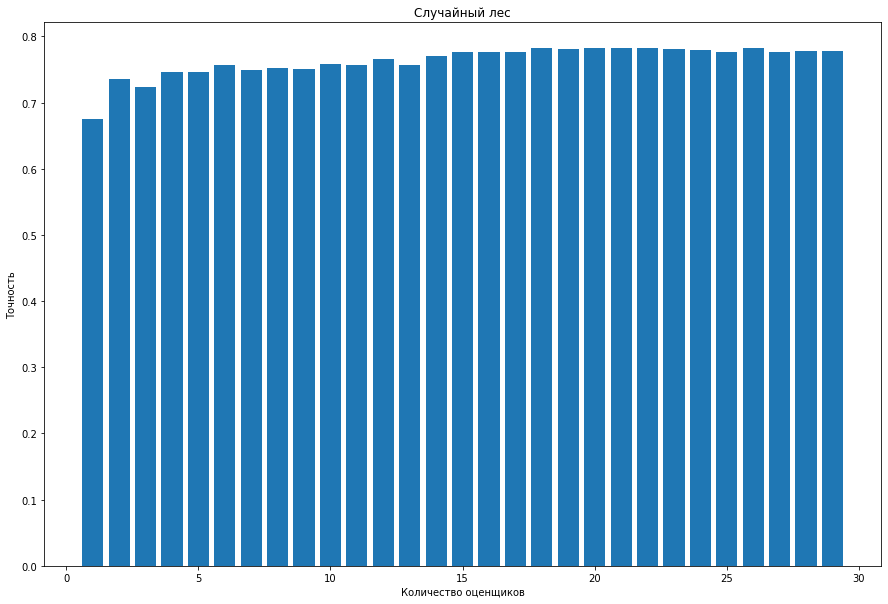

In [13]:
plt.figure(figsize=(15,10))
plt.bar(n_estimators_graph, result_draph)
plt.title('Случайный лес')
plt.xlabel("Количество оценщиков");
plt.ylabel("Точность");

Лучший результат показало количсетво оценщиков равное 23. Проверим поменяется ли точность при изменении гиперпараметров.

In [23]:
model = RandomForestClassifier(random_state=12345, n_estimators=18) # без изменений
model.fit(train_data_features, train_data_target)
valid_predictions = model.predict(valid_data_features)
result = accuracy_score(valid_data_target, valid_predictions)
print('Без изменений :',result)

model = RandomForestClassifier(random_state=12345, n_estimators=18, criterion='entropy') # значение criterion на entropy
model.fit(train_data_features, train_data_target)
valid_predictions = model.predict(valid_data_features)
result = accuracy_score(valid_data_target, valid_predictions)
print('entropy :',result)


model = RandomForestClassifier(random_state=12345, n_estimators=18, bootstrap=False) # значение bootstrap на False
model.fit(train_data_features, train_data_target)
valid_predictions = model.predict(valid_data_features)
result = accuracy_score(valid_data_target, valid_predictions)
print('False :',result)


model = RandomForestClassifier(random_state=12345, n_estimators=18, max_features='log2') # значение max_features на log2
model.fit(train_data_features, train_data_target)
valid_predictions = model.predict(valid_data_features)
result = accuracy_score(valid_data_target, valid_predictions)
print('log2 :',result)


model = RandomForestClassifier(random_state=12345, n_estimators=18, max_features='sqrt') #  значение max_features на sqrt
model.fit(train_data_features, train_data_target)
valid_predictions = model.predict(valid_data_features)
result = accuracy_score(valid_data_target, valid_predictions)
print('sqrt :',result)


model = RandomForestClassifier(random_state=12345, n_estimators=18, criterion='entropy', bootstrap=False) # entropy и False
model.fit(train_data_features, train_data_target)
valid_predictions = model.predict(valid_data_features)
result = accuracy_score(valid_data_target, valid_predictions)
print('entropy и False :',result)

Без изменений : 0.7822706065318819
entropy : 0.7900466562986003
False : 0.7729393468118196
log2 : 0.7822706065318819
sqrt : 0.7822706065318819
entropy и False : 0.7573872472783826


Изменение гиперпараметров не показало лучших результатов.

### Логистическая регрессия
<br>
Поиск лучшей модели логистической регрессии.

In [24]:
iter_graph = [] # создание списков для построения графика
accuracy_graph = []
top_iter = 0
top_accuracy = 0
for max_iter in range(1,40):
    model = LogisticRegression(random_state=12345, max_iter=max_iter) # меняя параметр max_iter найдем лучший результат
    model.fit(train_data_features, train_data_target)
    valid_predictions = model.predict(valid_data_features) 
    accuracy = accuracy_score(valid_data_target, valid_predictions)
    iter_graph.append(max_iter)
    accuracy_graph.append(accuracy)
    print('max_iter =', max_iter,':',accuracy)
    if accuracy > top_accuracy:
        top_iter, top_accuracy = max_iter, accuracy        
print(top_iter, top_accuracy)

max_iter = 1 : 0.7060653188180405
max_iter = 2 : 0.7060653188180405
max_iter = 3 : 0.7060653188180405
max_iter = 4 : 0.7060653188180405
max_iter = 5 : 0.7060653188180405
max_iter = 6 : 0.7060653188180405
max_iter = 7 : 0.7060653188180405
max_iter = 8 : 0.7060653188180405
max_iter = 9 : 0.7076205287713841
max_iter = 10 : 0.7076205287713841
max_iter = 11 : 0.7076205287713841
max_iter = 12 : 0.7076205287713841
max_iter = 13 : 0.7076205287713841
max_iter = 14 : 0.7076205287713841
max_iter = 15 : 0.7076205287713841
max_iter = 16 : 0.7076205287713841
max_iter = 17 : 0.7076205287713841
max_iter = 18 : 0.7076205287713841
max_iter = 19 : 0.7076205287713841
max_iter = 20 : 0.7076205287713841
max_iter = 21 : 0.7076205287713841
max_iter = 22 : 0.7076205287713841
max_iter = 23 : 0.7076205287713841
max_iter = 24 : 0.7076205287713841
max_iter = 25 : 0.7076205287713841
max_iter = 26 : 0.7076205287713841
max_iter = 27 : 0.7076205287713841
max_iter = 28 : 0.7076205287713841
max_iter = 29 : 0.70762052877

Построение графика для наглядности

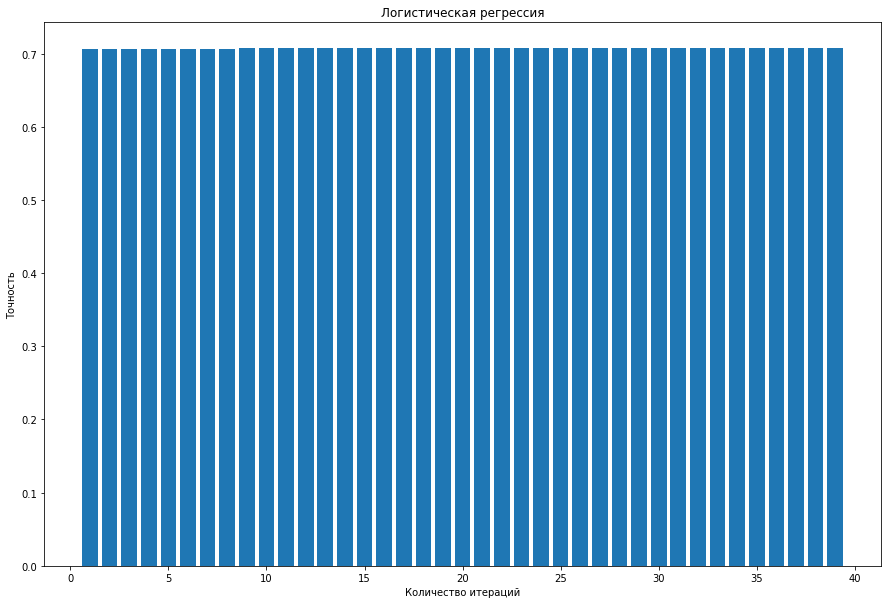

In [16]:
plt.figure(figsize=(15,10))
plt.bar(iter_graph, accuracy_graph)
plt.title('Логистическая регрессия')
plt.xlabel("Количество итераций");
plt.ylabel("Точность");

Лучший результат показало количество итераций равное 29. Проверим поменяется ли точность при изменении гиперпараметров. 

In [17]:
top_solver = '' # значений параметра solver
top_accuracy = 0

for solve in {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}:
    model = LogisticRegression(random_state=12345, max_iter=29, solver=solve)
    model.fit(train_data_features, train_data_target)
    valid_predictions = model.predict(valid_data_features)
    accuracy = accuracy_score(valid_data_target, valid_predictions)
    print('Solver', solve,'Точность',accuracy)

Solver liblinear Точность 0.7076205287713841
Solver newton-cg Точность 0.7558320373250389
Solver saga Точность 0.7060653188180405
Solver lbfgs Точность 0.7076205287713841
Solver sag Точность 0.7060653188180405


Не наблюдается улучшений в модели.

In [18]:
for penalt in {'l1', 'l2'}:
    model = LogisticRegression(random_state=12345, max_iter=29, penalty=penalt) # значение параметра penalty
    model.fit(train_data_features, train_data_target)
    valid_predictions = model.predict(valid_data_features)
    accuracy = accuracy_score(valid_data_target, valid_predictions)
    print('penalt', penalt,'Точность',accuracy)

penalt l1 Точность 0.7573872472783826
penalt l2 Точность 0.7076205287713841


Не наблюдается улучшений в модели.

In [19]:
model = LogisticRegression(random_state=12345, max_iter=29, solver='saga', l1_ratio=0.5, penalty='elasticnet') 
model.fit(train_data_features, train_data_target) # значение параметра penalty и solver
valid_predictions = model.predict(valid_data_features)
accuracy = accuracy_score(valid_data_target, valid_predictions)
print('Точность',accuracy)

Точность 0.7060653188180405


Не наблюдается улучшений в модели.

# Вывод
<br>
Лучшие результаты выявлены при следующих параметрах:

* решающее дерево - глубина деревьев 3, без изменения дополнительных параметров;
* случайный лес - количество оценщиков  23, без изменения дополнительных параметров;
* логистическая регрессия - количество итераций  29, без изменения дополнительных параметров.

## Проверьте модель на тестовой выборке

Проверим работу лучшх моделей на тестовой выборке.

In [26]:
data_features = pd.concat([train_data_features, valid_data_features], ignore_index=True) # объединение валидационной и 
data_target = pd.concat([train_data_target, valid_data_target], ignore_index=True)       # тренировочной выборки в обучающую

model = DecisionTreeClassifier(random_state=12345, max_depth=4) # решающее древо
model.fit(data_features, data_target)
test_predictions = model.predict(test_data_features)
result = accuracy_score(test_data_target,  test_predictions)
print('Точность',result)

#случайный лес
model = RandomForestClassifier(random_state=12345, n_estimators=18, criterion='entropy') # случайный лес
model.fit(data_features, data_target)
test_predictions = model.predict(test_data_features)
result = accuracy_score(test_data_target, test_predictions)
print('Точность',result)

#логистическая регрессия
model = LogisticRegression(random_state=12345, max_iter=9, penalty = 'l1') # логистическая регрессия
model.fit(data_features, data_target)
test_predictions = model.predict(test_data_features)
result = accuracy_score(test_data_target, test_predictions)
print('Точность',result)

Точность 0.7729393468118196
Точность 0.8055987558320373
Точность 0.7371695178849145


# Вывод
<br>
Решающий лес и случайный лес достигли точнти в 0.7729.
<br>
Лушчий результат показала модель случайного леса - 0,8056.
<br>
Худший результат показал модель логистической регрессии - 0,7372.

## (бонус) Проверьте модели на адекватность

Для проверки адекватности полученных модели сравню их точность с точностью эффективной модели.

In [21]:
X = data_features
y = data_target
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
display(dummy_clf.score(X, y))

0.6958381952547646

Т.к. точность моделей выше тончости фиктивной модели, следовательно они все адекватные. 

# Общий вывод

В ходе исследования проверена точность моделей предсказания на тестовой выборке.

Самой точной моделью и одновременно самой адекватной - случайный лес с количеством оценщиков 23, без изменения дополнительных параметров.

Я считаю, что 80,6 % точности модели случайного леса достаточно, для того, чтобы построить систему, которая будет способна  проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».